<a href="https://colab.research.google.com/github/yuaquintero/U4-Project-CNN/blob/master/CNN_Scene_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
import cv2

In [2]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Load data

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q" -O intel-image-classification.zip && rm -rf /tmp/cookies.txt

--2020-05-01 07:51:06--  https://docs.google.com/uc?export=download&confirm=dZUB&id=1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.100, 74.125.20.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-bo-docs.googleusercontent.com/docs/securesc/eu6idne69c527ii695isqjslnvl0ks7b/uusmr6fu4pp4g4irdo6kcu3h3u3jm57c/1588319400000/12257531938772176428/00259763406590565242Z/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q?e=download [following]
--2020-05-01 07:51:06--  https://doc-10-bo-docs.googleusercontent.com/docs/securesc/eu6idne69c527ii695isqjslnvl0ks7b/uusmr6fu4pp4g4irdo6kcu3h3u3jm57c/1588319400000/12257531938772176428/00259763406590565242Z/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q?e=download
Resolving doc-10-bo-docs.googleusercontent.com (doc-10-bo-docs.googleusercontent.com)... 74.125.28.132, 2607:f8b0:400e:c04::84
Connecting to d

https://drive.google.com/file/d/1jbfOzGcyVwnePM_LPXo2zgaUM8hkJc8q/view?usp=sharing

In [5]:
!mkdir data
!unzip intel-image-classification.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/seg_train/seg_train/mountain/7537.jpg  
  inflating: data/seg_train/seg_train/mountain/7539.jpg  
  inflating: data/seg_train/seg_train/mountain/7551.jpg  
  inflating: data/seg_train/seg_train/mountain/7560.jpg  
  inflating: data/seg_train/seg_train/mountain/7565.jpg  
  inflating: data/seg_train/seg_train/mountain/7578.jpg  
  inflating: data/seg_train/seg_train/mountain/7581.jpg  
  inflating: data/seg_train/seg_train/mountain/7586.jpg  
  inflating: data/seg_train/seg_train/mountain/7647.jpg  
  inflating: data/seg_train/seg_train/mountain/7652.jpg  
  inflating: data/seg_train/seg_train/mountain/7654.jpg  
  inflating: data/seg_train/seg_train/mountain/7662.jpg  
  inflating: data/seg_train/seg_train/mountain/767.jpg  
  inflating: data/seg_train/seg_train/mountain/7672.jpg  
  inflating: data/seg_train/seg_train/mountain/7679.jpg  
  inflating: data/seg_train/seg_train/mountain/7681.jpg  
  inflating: data/seg_

In [0]:
data_train = './data/seg_train/seg_train'
data_test = './data/seg_test/seg_test'

In [0]:
ImageHeight, ImageWeithg= 150, 150
classes=6

# Prepare data

Generer data train

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [16]:
train_gen= train_datagen.flow_from_directory(
    data_train,
    target_size=(ImageHeight, ImageWeithg),
    batch_size=32,
    class_mode='categorical')


Found 14034 images belonging to 6 classes.


Generer data test

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
test_gen = test_datagen.flow_from_directory(
    data_test,
    target_size=(ImageHeight, ImageWeithg),
    batch_size=32,
    class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [0]:
from keras.preprocessing.image import load_img, img_to_array
import os

## Convert images into array

In [0]:
def get_images(directory):
    Images = []
    Labels = [] 
    for labels in os.listdir(directory):
         if labels == 'buildings':
            label = 0
         elif labels == 'forest':
            label = 1   
         elif  labels == 'glacier': 
            label = 2
         elif labels == 'mountain':
            label = 3   
         elif labels == 'sea':
            label = 4   
         elif labels == 'street':
            label = 5    
         for image_file in os.listdir(directory+'/'+labels): 
            image = cv2.imread(directory+ '/'+labels+'/'+image_file) 
            image = cv2.resize(image,(150,150))  
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1000) 

In [0]:
x_train,y_train = get_images('./data/seg_train/seg_train')
x_train = np.array(x_train)
y_train= np.array(y_train)

In [41]:
print(x_train.shape)
print(y_train.shape)

(14034, 150, 150, 3)
(14034,)


In [0]:
x_test,y_test = get_images(data_test)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [43]:
print(x_test.shape)
print(y_test.shape)

(3000, 150, 150, 3)
(3000,)



### observe number of images per class

In [0]:
class_train,counts_train=np.unique(Label_train,return_counts=True)
class_test,counts_test=np.unique(Labels_test ,return_co1unts=True)
plt.figure(figsize=(20,20))
width=0.28
labels=['buildings', 'forest', 'glacier','mountain','sea','street']
x=np.arange(classes)
fig,ax=plt.subplots()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,counts_train, width, label='train')
ax.bar(x+0.28,counts_test, width, label='test')
ax.legend()

Print some images with their respective classes

In [0]:
labels_class = {0:'buildings', 1:'forest', 2:'glacier',3:'mountain',4:'sea', 5:'street'}

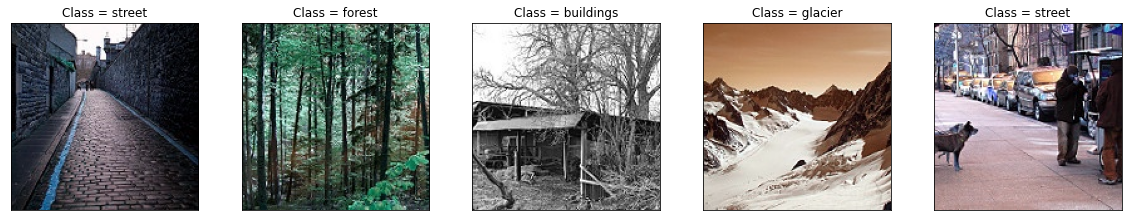

In [44]:
fig = plt.figure(figsize = (20,20))
for i in range(5):  
  index = np.random.randint(x_train.shape[0])
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title("Class = "+labels_class[y_train[index]])
  plt.imshow(x_train[index])


# Build Models

 Firts model

*   First convolutional layer : 32 filters, filter size (3,3)
*   Second convolutional layer : 64 filters, filter size (2,2)

In [0]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, kernel_size=(3,3), padding ="same", input_shape=(ImageHeight, ImageWeithg, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Convolution2D(64, kernel_size=(2,2), padding ="same"))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(6, activation='softmax'))
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               22429952  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [0]:
cnn_model.fit(
    train_gen,
    steps_per_epoch=100,
    epochs=32,
    validation_data=test_gen,
    validation_steps=100
    )

In [53]:
print(x_train.shape)
print(y_train.shape)

(14034, 150, 150, 3)
(14034,)


In [54]:
trained = cnn_model.fit(x_train,y_train,epochs=30,validation_split=0.30)

Epoch 1/30
307/307 [==============================] - 279s 908ms/step - loss: 82.2353 - accuracy: 0.2172 - val_loss: 1.7739 - val_accuracy: 0.1921
Epoch 2/30
307/307 [==============================] - 278s 907ms/step - loss: 1.8011 - accuracy: 0.1875 - val_loss: 1.7883 - val_accuracy: 0.1831
Epoch 3/30
307/307 [==============================] - 279s 908ms/step - loss: 1.7758 - accuracy: 0.1874 - val_loss: 1.7904 - val_accuracy: 0.1819
Epoch 4/30
307/307 [==============================] - 278s 907ms/step - loss: 1.7928 - accuracy: 0.1803 - val_loss: 1.7922 - val_accuracy: 0.1819
Epoch 5/30
307/307 [==============================] - 279s 909ms/step - loss: 1.7921 - accuracy: 0.1781 - val_loss: 1.7905 - val_accuracy: 0.1821
Epoch 6/30
307/307 [==============================] - 282s 920ms/step - loss: 1.7904 - accuracy: 0.1782 - val_loss: 1.7905 - val_accuracy: 0.1821
Epoch 7/30
307/307 [==============================] - 282s 918ms/step - loss: 1.7904 - accuracy: 0.1782 - val_loss: 1.7906 

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
target_dir = 'drive/My Drive/Colab Notebooks/modelos/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn_model.save('drive/My Drive/Colab Notebooks/modelos/modelo.h5')
cnn_model.save_weights('drive/My Drive/Colab Notebooks/modelos/pesos.h5')

In [0]:
trained = cnn_model.fit(x_train,y_train,epochs=32,batch_size=64,validation_split=0.30)

In [0]:
Images,Labels = get_images('./data/seg_train/seg_train')
Images = np.array(Images)
Labels = np.array(Labels)

In [0]:
trained =cnn_model.fit(Images_train,Label_train,epochs=30,validation_split=0.30)

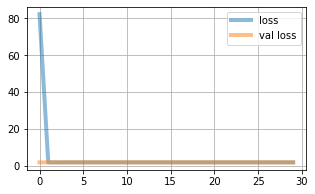

In [67]:
plt.figure(figsize=(5,3))
loss  = cnn_model.history.history["loss"]
vloss = cnn_model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [68]:
preds_train = cnn_model.predict(x_train).argmax(axis=1)
preds_test = cnn_model.predict(x_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 0.179
accuracy test  0.175


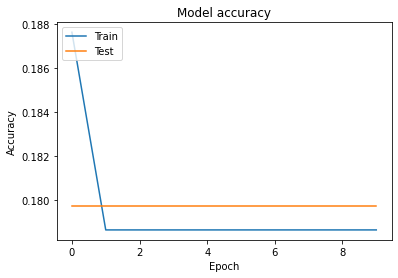

In [0]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


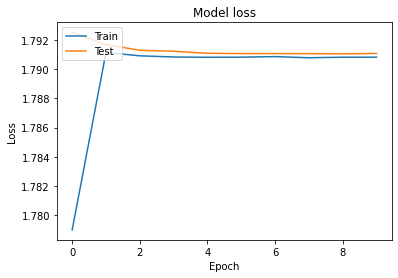

In [0]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
cnn_model.predict()